---
# 3.3 Divided differences and Newton's form
---

$%%% My LaTeX definitions
\DeclareMathOperator{\span}{span}
\newcommand{\Pbf}{\mathbf{P}}
$
The Lagrange polynomial basis can be thought of as

$$
\phi_j(x) = \prod_{\substack{i = 0 \\ i \neq j}}^n (x - x_i), 
\quad j = 0,1,\ldots,n.
$$

The **Newton polynomial** basis is defined in a very similar way:

$$
\phi_j(x) = \prod_{i = 0}^{j-1} (x - x_i), 
\quad j = 0,1,\ldots,n.
$$




Using the Newton basis, the matrix

$$
A = 
\begin{bmatrix}
\phi_0(x_0) & \phi_1(x_0) & \cdots & \phi_n(x_0)\\
\phi_0(x_1) & \phi_1(x_1) & \cdots & \phi_n(x_1)\\
\vdots & \vdots & \ddots & \vdots\\
\phi_0(x_n) & \phi_1(x_n) & \cdots & \phi_n(x_n)\\
\end{bmatrix}
$$

is **lower-triangular**. This means that we can solve $Ac = y$ using **forward-substitution** in $\mathcal{O}(n^2)$ flops.

---

## Example

The Newton polynomial basis for the data

$$
\begin{gather}
(x_0,y_0) = (2,1)\\
(x_1,y_1) = (6,2)\\
(x_2, y_2) = (4,3)\\
(x_3, y_3) = (8,2)\\
\end{gather}
$$

is the following set of polynomials

$$
\begin{align}
\phi_0(x) & = 1 \\
\phi_1(x) & = (x-2) \\
\phi_2(x) & = (x-2)(x-6) \\
\phi_3(x) & = (x-2)(x-6)(x-4) \\
\end{align}
$$

Using this basis, we find the interpolating polynomial

$$p(x) = c_0 \phi_0(x) + c_1 \phi_1(x) + c_2 \phi_2(x) + c_3 \phi_3(x)$$

by solving the linear system $Ac = y$, where

$$
A = 
\begin{bmatrix}
\phi_0(x_0) & \phi_1(x_0) & \phi_2(x_0) & \phi_3(x_0)\\
\phi_0(x_1) & \phi_1(x_1) & \phi_2(x_1) & \phi_3(x_1)\\
\phi_0(x_2) & \phi_1(x_2) & \phi_2(x_2) & \phi_3(x_2)\\
\phi_0(x_3) & \phi_1(x_3) & \phi_2(x_3) & \phi_3(x_3)\\
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 0 & 0 \\
1 & 4 & 0 & 0 \\
1 & 2 & -4 & 0 \\
1 & 6 & 12 & 48 \\
\end{bmatrix}.
$$

Thus, $Ac = y$ is as follows.

$$
\begin{matrix}
c_0 & &       & &       & &       &=& 1 \\
c_0 &+& 4 c_1 & &       & &       &=& 2 \\
c_0 &+& 2 c_1 &-& 4c_2  & &       &=& 3 \\
c_0 &+& 6 c_1 &+& 12c_2 &+& 48c_3 &=& 2 \\
\end{matrix}
$$

We solve this system by forward-substitution:

$$
\begin{align}
c_0 &= 1 
\\
c_1 &= \frac{1}{4} (2 - c_0) = \frac{1}{4} (2 - 1) = \frac{1}{4} 
\\
c_2 &= -\frac{1}{4}(3 - c_0 - 2 c_1) = -\frac{1}{4}\left(3 - 1 - \frac{2}{4}\right) = -\frac38
\\
c_3 &= \frac{1}{48}(2 - c_0 - 6 c_1 - 12 c_2) = \frac{1}{48}\left(2 - 1 - \frac{6}{4}  + 12 \frac38\right) = \frac{1}{12}
\\
\end{align}
$$

In [1]:
x = [2, 6, 4, 8]
y = [1, 2, 3, 2]

# Define A
A = Rational[1 0 0 0; 1 4 0 0; 1 2 -4 0; 1 6 12 48]

# Solve for the Newton polynomial coefficients
cnewt = A\y

4-element Array{Rational{Int64},1}:
  1//1 
  1//4 
 -3//8 
  1//12

Thus, the interpolating polynomial is 

$$
p(x) = 1 + \frac14(x-2) - \frac38(x-2)(x-6) + \frac{1}{12}(x-2)(x-6)(x-4)
$$

In [2]:
########################################
function newtinterp(x::Vector, y::Vector)
    n = length(x)

    # Compute the matrix A corresponding to the Newton basis
    A = [prod(Float64[x[i] - x[k] for k=1:j]) for i=1:n, j=0:n-1]

    # Solve Ac = y
    c = A\y
end
########################################

x = [2, 6, 4, 8]
y = [1, 2, 3, 2]

newtinterp(x, y)

4-element Array{Float64,1}:
  1.0      
  0.25     
 -0.375    
  0.0833333

Let's check that we obtained the same polynomial as before.

In [3]:
import SymPy

x = SymPy.symbols("x")

phinewt = [
    1,
    (x - 2),
    (x - 2)*(x - 6),
    (x - 2)*(x - 6)*(x - 4)
]

4-element Array{SymPy.Sym,1}:
                       1
                   x - 2
         (x - 6)*(x - 2)
 (x - 6)*(x - 4)*(x - 2)

In [4]:
cnewt

4-element Array{Rational{Int64},1}:
  1//1 
  1//4 
 -3//8 
  1//12

In [5]:
pnewt = dot(cnewt, phinewt)

x   (x - 6)*(x - 4)*(x - 2)   3*(x - 6)*(x - 2)   1
- + ----------------------- - ----------------- + -
4              12                     8           2

In [6]:
pnewt = SymPy.expand(pnewt)

 3       2           
x    11*x    83*x    
-- - ----- + ---- - 8
12     8      12     

In [7]:
x = [2, 6, 4, 8]
y = [1, 2, 3, 2]
n = length(x) - 1
A = Rational[xi^j for xi in x, j=0:n]
cmono = A\y

x = SymPy.symbols("x")
phimono = [x^j for j=0:3]
pmono = dot(cmono, phimono)

 3       2           
x    11*x    83*x    
-- - ----- + ---- - 8
12     8      12     

In [8]:
pmono == pnewt

true

As expected, the interpolating polynomial obtained using the Newton basis matches the interpolating polynomial obtained from the monomial basis.

---

## Divided differences

Given the data points $\left\{(x_i,y_i)\right\}_{i=0}^n$, where $y_i = f(x_i)$, the Newton form of the interpolating polynomial can also be written in closed-form as:

$$p(x) = \sum_{j=0}^n c_j \phi_j(x) = \sum_{j=0}^n \left( f[x_0,\ldots,x_j] \prod_{i=0}^{j-1}(x-x_i) \right).$$

That is, the coefficient $c_j$ of $\phi_j(x)$ is the so-called **$j$th divided difference**:

$$c_j = f[x_0,\ldots,x_j].$$

Divided differences are defined recursively by

$$f[x_i] = f(x_i), \qquad \text{for } 1\leq i \leq n,$$

and

$$f[x_i,\ldots,x_j] = \frac{f[x_{i+1},\ldots,x_j] - f[x_i,\ldots,x_{j-1}]}{x_j - x_i}, \qquad \text{for } 1\leq i < j \leq n.$$

## Computing the divided differences

Divided differences can be nicely represented in a table as follows.

$$
\begin{array}{c||c|ccccc}
i & x_i & f[x_i] & f[x_{i-1},x_i] & f[x_{i-2},x_{i-1},x_i] & \cdots & f[x_0,\ldots,x_n] \\ \hline
0 & x_0 & f(x_0) \\
1 & x_1 & f(x_1) & f[x_0,x_1] \\
2 & x_2 & f(x_2) & f[x_1,x_2] & f[x_0,x_1,x_2] \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots  \\
n & x_n & f(x_n) & f[x_{n-1},x_n] & f[x_{n-2},x_{n-1},x_n] & \cdots & f[x_0,\ldots,x_n] \\
\end{array}
$$

Note that the coefficients $c_j = f[x_0,\ldots,x_j]$ of the Newton polynomial appear along the diagonal of the table.

---

## Example

Let's complete the divided difference table for the data

$$
\begin{gather}
(x_0,y_0) = (2,1)\\
(x_1,y_1) = (6,2)\\
(x_2, y_2) = (4,3)\\
(x_3, y_3) = (8,2)\\
\end{gather}
$$

In [9]:
384//4

96//1

\begin{array}{c|c|cccc}
i & x_i & f[\cdot] & f[\cdot,\cdot] & f[\cdot,\cdot,\cdot] & f[\cdot,\cdot,\cdot,\cdot] \\
\hline
0 & 2 & 1 &  &  \\
1 & 6 & 2 & \frac{2-1}{6-2} &  \\
2 & 4 & 3 & \frac{3-2}{4-6} &  & \\
3 & 8 & 2 & \frac{2-3}{8-4} &  &  \\
\end{array}

In [10]:
(185//12 - 1//4)/8

91//48

\begin{array}{c|c|cccc}
i & x_i & f[\cdot] & f[\cdot,\cdot] & f[\cdot,\cdot,\cdot] & f[\cdot,\cdot,\cdot,\cdot] \\
\hline
0 & 2 & 1 &  &  \\
1 & 6 & 2 & \frac{1}{4} &  \\
2 & 4 & 3 & -\frac{1}{2} & \frac{-\frac12 - \frac14}{4-2} & \\
3 & 8 & 2 & -\frac{1}{4} & \frac{-\frac14 + \frac12}{8-6} &  \\
\end{array}

\begin{array}{c|c|cccc}
i & x_i & f[\cdot] & f[\cdot,\cdot] & f[\cdot,\cdot,\cdot] & f[\cdot,\cdot,\cdot,\cdot] \\
\hline
0 & 2 & 1 &  &  \\
1 & 6 & 2 & \frac{1}{4} &  \\
2 & 4 & 3 & -\frac{1}{2} & -\frac38 & \\
3 & 8 & 2 & -\frac{1}{4} & \frac18 & \frac{\frac18 + \frac38}{8-2} \\
\end{array}

\begin{array}{c|c|cccc}
i & x_i & f[\cdot] & f[\cdot,\cdot] & f[\cdot,\cdot,\cdot] & f[\cdot,\cdot,\cdot,\cdot] \\
\hline
0 & 2 & 1 &  &  \\
1 & 6 & 2 & \frac{1}{4} &  \\
2 & 4 & 3 & -\frac{1}{2} & -\frac38 & \\
3 & 8 & 2 & -\frac{1}{4} & \frac18 & \frac{1}{12} \\
\end{array}

Thus, the interpolating polynomial is 

$$
p(x) = 1 + \frac14(x-2) - \frac38(x-2)(x-6) + \frac{1}{12}(x-2)(x-6)(x-4).
$$

Note that the Newton form can be evaluated using a nested approach:

$$
p(x) = 1 + (x-2)\Bigg( \frac14 + (x-6)\bigg(-\frac38 + \frac{1}{12}(x-4)\bigg) \Bigg).
$$

---

## Computing the divided differences

In [11]:
###############################
function divdif{T}(x::Vector{T}, y::Vector{T})

    n = length(x)
    Table = zeros(T, n, n)
    
    Table[:, 1] = y
    for k = 2:n
        for i=k:n
            Table[i, k] = Table[i, k-1] - Table[i-1, k-1]
            Table[i, k] /= x[i] - x[i-k+1]
        end
    end
    
    c = diag(Table)
    
    return c, Table
end
###############################

divdif (generic function with 1 method)

In [12]:
methods(divdif)

# 1 method for generic function "divdif":
divdif(x::Array{T,1}, y::Array{T,1}) where T in Main at In[11]:4

In [13]:
x = [3, 5, 7, 11//1]
y = [4, 9, 16, 400//1]
c, T = divdif(x, y)
T

4×4 Array{Rational{Int64},2}:
   4//1   0//1    0//1    0//1 
   9//1   5//2    0//1    0//1 
  16//1   7//2    1//4    0//1 
 400//1  96//1  185//12  91//48

In [14]:
x = [2, 6, 4, 8//1]
y = [1, 2, 3, 2//1]
c, T = divdif(x, y)
T

4×4 Array{Rational{Int64},2}:
 1//1   0//1   0//1  0//1 
 2//1   1//4   0//1  0//1 
 3//1  -1//2  -3//8  0//1 
 2//1  -1//4   1//8  1//12

In [15]:
###############################
function evalnewt(
        xspan::AbstractVector, 
        x::Vector, 
        c::Vector)
    n = length(x)
    
    p = c[n]*ones(xspan)
    for i = 1:length(p)
        for j = n-1:-1:1
            p[i] *= xspan[i] - x[j]
            p[i] += c[j]
        end
    end
    
    return p
end

evalnewt(xx::Real, x::Vector, c::Vector) = evalnewt([xx], x, c)[1]
###############################

evalnewt (generic function with 2 methods)

In [16]:
x = [2, 6, 4, 8.]
y = [1, 2, 3, 2.]
c, T = divdif(x, y)
c

4-element Array{Float64,1}:
  1.0      
  0.25     
 -0.375    
  0.0833333

In [17]:
x = [3, 5, 7, 11.]
y = [4, 9, 16, 400.]
c, T = divdif(x, y)
T

4×4 Array{Float64,2}:
   4.0   0.0   0.0     0.0    
   9.0   2.5   0.0     0.0    
  16.0   3.5   0.25    0.0    
 400.0  96.0  15.4167  1.89583

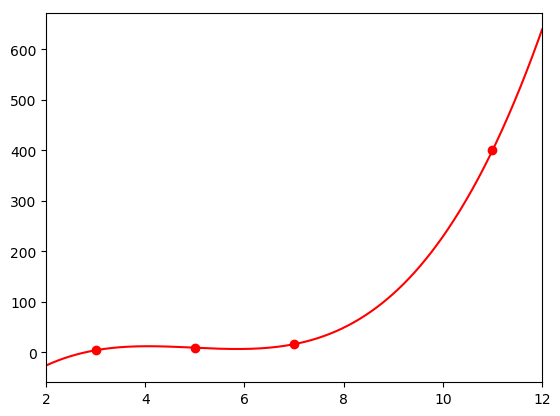

In [18]:
using PyPlot

a, b = 2, 12

xspan = linspace(a, b, 1000)
yy = evalnewt(xspan, x, c)

plot(xspan, yy, "r")
plot(x, y, "ro")
xlim(a, b);

---

> ## Theorem: (Divided Differences and Newton's Form)
>
Given the data points $\left\{(x_i,y_i)\right\}_{i=0}^n$, where $y_i = f(x_i)$, the Newton form of the interpolating polynomial can be written as:
>
$$p(x) = \sum_{j=0}^n \left( f[x_0,\ldots,x_j] \prod_{i=0}^{j-1}(x-x_i) \right),$$
>
where the divided differences are defined recursively by
>
$$f[x_i] = f(x_i), \qquad \text{for } 1\leq i \leq n,$$
>
and
>
$$f[x_i,\ldots,x_j] = \frac{f[x_{i+1},\ldots,x_j] - f[x_i,\ldots,x_{j-1}]}{x_j - x_i}, \qquad \text{for } 0\leq i < j \leq n.$$

## Proof:

We will prove this fact by induction on $n$. When $n=1$, we are interpolating the data points $(x_0, f(x_0))$ and $(x_1, f(x_1))$ using the basis

$$
\begin{align}
\phi_0(x) & = 1, \\
\phi_1(x) & = (x-x_0). \\
\end{align}
$$

Thus we want to find $c_0$ and $c_1$ such that

$$p(x) = c_0 + c_1 (x-x_0)$$

satisfies $p(x_0) = f(x_0)$ and $p(x_1) = f(x_1)$. This gives us the following linear system.

$$
\begin{matrix}
c_0 & &                 &=& f(x_0) \\
c_0 &+& (x_1 - x_0) c_1 &=& f(x_1) \\
\end{matrix}
$$

Thus,

$$c_0 = f(x_0) = f[x_0], \qquad \text{and} \qquad c_1 = \frac{f(x_1)-f(x_0)}{x_1-x_0} = \frac{f[x_1]-f[x_0]}{x_1-x_0} = f[x_0,x_1],$$

as required.

Now we suppose the result is true for $n = k$, and we will prove that this implies the result is true for $n = k+1$. 

Let $p(x)$ be the unique polynomial of degree at most $k+1$ that interpolates the points $(x_0, f(x_0)), \ldots, (x_{k+1}, f(x_{k+1}))$. 

Let $q_0(x)$ be the unique polynomial of degree at most $k$ that interpolates the first $k+1$ points $(x_0, f(x_0)), \ldots, (x_{k}, f(x_{k}))$.

Let $q_1(x)$ be the unique polynomial of degree at most $k$ that interpolates the last $k+1$ points $(x_1, f(x_1)), \ldots, (x_{k+1}, f(x_{k+1}))$. 

By the induction assumption, we have

$$
q_0(x) = \sum_{j=0}^{k} \left( f[x_0,\ldots,x_j] \prod_{i=0}^{j-1}(x-x_i) \right)
$$
and
$$
q_1(x) = \sum_{j=1}^{k+1} \left( f[x_1,\ldots,x_j] \prod_{i=1}^{j-1}(x-x_i) \right).
$$

To obtain $p(x)$ we just need to add to $q_0(x)$ a multiple of the basis polynomial $\prod_{i=0}^k (x-x_i)$:

$$p(x) = q_0(x) + c_{k+1} \prod_{i=0}^k (x-x_i).$$

If $c_{k+1}$ satisfies

$$f(x_{k+1}) = q_0(x_{k+1}) + c_{k+1} \prod_{i=0}^k (x_{k+1}-x_i),$$

then $p(x)$ will interpolate $(x_0, f(x_0)), \ldots, (x_{k+1}, f(x_{k+1}))$.

In a similar way, we can add to $q_1(x)$ a multiple of the basis polynomial $\prod_{i=1}^{k+1} (x-x_i)$ to obtain $p(x)$. Thus,

$$p(x) = q_1(x) + c_{k+1}' \prod_{i=1}^{k+1} (x-x_i),$$

where $c_{k+1}'$ satisfies

$$f(x_0) = q_1(x_0) + c_{k+1}' \prod_{i=1}^{k+1} (x_0-x_i).$$


Now we have that 

$$q_0(x) + c_{k+1} \prod_{i=0}^k (x-x_i) = q_1(x) + c_{k+1}' \prod_{i=1}^{k+1} (x-x_i).$$

Thus

$$
\frac{d^{k+1}}{dx^{k+1}}\left(q_0(x) + c_{k+1} \prod_{i=0}^k (x-x_i)\right) 
= 
\frac{d^{k+1}}{dx^{k+1}}\left(q_1(x) + c_{k+1}' \prod_{i=1}^{k+1} (x-x_i)\right).
$$

Since $q_0(x)$ and $q_1(x)$ have degree at most $k$, and 

$$
\prod_{i=0}^k (x-x_i) = x^{k+1} + \ldots
\qquad
\text{and}
\qquad
\prod_{i=1}^{k+1} (x-x_i) = x^{k+1} + \ldots,
$$

we have 

$$0 + c_{k+1}(k+1)! = 0 + c_{k+1}'(k+1)!,$$

which implies $c_{k+1} = c_{k+1}'$.



Thus we have

$$
q_0(x) + c_{k+1} \prod_{i=0}^k (x-x_i) 
= 
q_1(x) + c_{k+1} \prod_{i=1}^{k+1} (x-x_i).
$$

Now consider 

$$
\frac{d^k}{dx^k}\left(q_0(x) + c_{k+1} \prod_{i=0}^k (x-x_i)\right)
= 
\frac{d^k}{dx^k}\left(q_1(x) + c_{k+1} \prod_{i=1}^{k+1} (x-x_i)\right).
$$

Note that

$$
q_0(x) = f[x_0,\ldots,x_k] x^k + \ldots
\qquad \text{and} \qquad
q_1(x) = f[x_1,\ldots,x_{k+1}] x^k + \ldots.
$$

Also,

$$
\prod_{i=0}^k (x-x_i) = x^{k+1} - x^{k}\sum_{i=0}^k x_i + \ldots
\qquad \text{and} \qquad
\prod_{i=1}^{k+1} (x-x_i) = x^{k+1} - x^{k}\sum_{i=1}^{k+1} x_i + \ldots.
$$

Thus,

$$
k! f[x_0,\ldots,x_k] + c_{k+1} \left((k+1)!x - k! \sum_{i=0}^k x_i\right)
$$
$$
=
k! f[x_1,\ldots,x_{k+1}] + c_{k+1} \left((k+1)!x - k! \sum_{i=1}^{k+1} x_i\right).
$$

Dividing by $k!$, and rearranging, we have

$$
c_{k+1} \left((k+1)x - \sum_{i=0}^k x_i\right) - c_{k+1} \left((k+1)x - \sum_{i=1}^{k+1} x_i\right)
=
f[x_1,\ldots,x_{k+1}] - f[x_0,\ldots,x_k].
$$

Canceling common terms, we have

$$
c_{k+1} \left(\sum_{i=1}^{k+1} x_i - \sum_{i=0}^k x_i\right)
=
f[x_1,\ldots,x_{k+1}] - f[x_0,\ldots,x_k],
$$

which becomes

$$
c_{k+1} \left(x_{k+1} - x_0\right)
=
f[x_1,\ldots,x_{k+1}] - f[x_0,\ldots,x_k].
$$

Finally,

$$
c_{k+1}
=
\frac{f[x_1,\ldots,x_{k+1}] - f[x_0,\ldots,x_k]}{x_{k+1} - x_0} = f[x_0,\ldots,x_{k+1}].
$$

Therefore,

$$p(x) = q_0(x) + c_{k+1} \prod_{i=0}^k (x-x_i) = \sum_{j=0}^{k+1} \left( f[x_0,\ldots,x_j] \prod_{i=0}^{j-1}(x-x_i) \right),$$

as required. $\blacksquare$


---

## Error formula for Newton polynomial

Suppose we are approximating a function $f$ over the interval $[a,b]$ by using the unique polynomial $p_n$ of degree at most $n$ that interpolates the $n+1$ points

$$(x_0,f(x_0)), \ldots, (x_n,f(x_n)).$$

We will assume that some $x_i = a$ and some $x_j = b$ (i.e., we are only considering **interpolation error**, not **extrapolation error**).

We want to measure the **approximation error** at some $\bar x \in [a,b]$:

$$e_n(\bar x) = f(\bar x) - p_n(\bar x).$$

 >### Big idea on Newton interpolation:

>Let $p_{n+1}$ be the polynomial that interpolates the $n+2$ points

>$$(x_0,f(x_0)), \ldots, (x_n,f(x_n)), (\bar x,f(\bar x)).$$

Then

$$p_{n+1}(\bar x) = f(\bar x).$$

Also, we know that to obtain $p_{n+1}(x)$ from $p_n(x)$, we just need to add a multiple of the Newton basis polynomial,

$$\phi_n(x) = \prod_{i=0}^n (x - x_i).$$

Specifically, we have

$$p_{n+1}(x) = p_n(x) + f[x_0,\ldots,x_n,\bar x] \phi_n(x).$$

Thus, 

$$
\begin{align}
e_n(\bar x) 
& = f(\bar x) - p_n(\bar x) \\
& = p_{n+1}(\bar x) - p_n(\bar x) \\
& = f[x_0,\ldots,x_n,\bar x] \phi_n(\bar x).\\
\end{align}
$$

Therefore, the **approximation error** is

$$f(\bar x) - p_n(\bar x) = f[x_0,\ldots,x_n,\bar x] \prod_{i=0}^n (\bar x-x_i).$$

Note that we need to know $f(\bar x)$ to compute the right-hand-side of this formula. We need to estimate the divided difference.

### Bounding the approximation error

We will use the following generalization of the Mean Value Theorem to bound the approximation error.

> ### Theorem: (Divided Difference and Derivative)
Let:
- $f \in C^n[a,b]$,
- $x_0,\ldots,x_n \in [a,b]$ be distinct. 
>
Then there is a $\xi$ somewhere between $x_0,\ldots,x_n$ such that
>
$$ f[x_0,\ldots,x_n] = \frac{f^{(n)}(\xi)}{n!}. $$

### Proof:

Let $p(x)$ be the unique polynomial of degree at most $n$ that interpolates 

$$(x_0,f(x_0)),\ldots,(x_n,f(x_n)),$$

and let $e(x) = f(x) - p(x)$. Note that $e(x)$ has $n+1$ roots at $x_0,\ldots,x_n$. 

$$e(x_0) = \cdots = e(x_n) = 0.$$

Note that $e \in C^n[a,b]$.

Then by **Rolle's Theorem** (or the **Mean Value Theorem**), there are $\xi^{(1)}_0,\ldots,\xi^{(1)}_{n-1}$ points between the points $x_0,\ldots,x_n$ such that

$$e'(\xi^{(1)}_0) = \cdots = e'(\xi^{(1)}_{n-1}) = 0.$$

Now there are $\xi^{(2)}_0,\ldots,\xi^{(2)}_{n-2}$ points between the points $\xi^{(1)}_0,\ldots,\xi^{(1)}_{n-1}$ such that

$$e''(\xi^{(2)}_0) = \cdots = e''(\xi^{(2)}_{n-2}) = 0.$$

We can keep repeating this process and finally conclude that there is a point $\xi = \xi^{(n)}_0$ somewhere between the points $x_0,\ldots,x_n$ such that

$$e^{(n)}(\xi) = 0.$$

Now, since

$$p(x) = f[x_0,\ldots,x_n]x^n + \ldots,$$

and $e(x) = f(x) - p(x)$, we have

$$e^{(n)}(x) = f^{(n)}(x) - f[x_0,\ldots,x_n] n!.$$

Plugging in $\xi$, we have

$$0 = f^{(n)}(\xi) - f[x_0,\ldots,x_n] n!,$$

which implies that

$$f[x_0,\ldots,x_n] = \frac{f^{(n)}(\xi)}{n!}. \quad \blacksquare$$

### Note

Using the convention that

$$
f[\underbrace{x,\ldots,x}_{\text{$k$ times}}] = \frac{f^{(k)}(x)}{k!}, \qquad \text{for $k=0,1,\ldots$,}
$$

we can prove a more general result where the points do not need to be distinct.

> ### Theorem: (Divided Difference and Derivative)
Let:
- $f \in C^n[a,b]$,
- $x_0,\ldots,x_n \in [a,b]$. 
>
Then there is a $\xi$ somewhere between $x_0,\ldots,x_n$ such that
>
$$ f[x_0,\ldots,x_n] = \frac{f^{(n)}(\xi)}{n!}. $$

The proof is similar to the above argument, but is more complicated.

Recall from above that the **approximation error** is 

$$f(\bar x) - p_n(\bar x) = f[x_0,\ldots,x_n,\bar x] \prod_{i=0}^n (\bar x-x_i).$$

Assuming that $f \in C^{(n+1)}[a,b]$, there is a $\xi \in (a,b)$ such that

$$f(\bar x) - p_n(\bar x) = \frac{f^{(n+1)}(\xi)}{(n+1)!} \prod_{i=0}^n (\bar x-x_i).$$

Define the **max-norm** of the function $f^{(n+1)}$ as

$$\left\|f^{(n+1)}\right\| = \max_{x \in [a,b]} \left|f^{(n+1)}(x)\right|.$$ 

Then we have an upper bound on the absolute approximation error at $\bar x$:

$$\left|f(\bar x) - p_n(\bar x)\right| \leq \frac{\left\|f^{(n+1)}\right\|}{(n+1)!} \left|\prod_{i=0}^n (\bar x-x_i)\right|.$$
    
>The **maximum approximation error** over the interval $[a,b]$ has the following bound:

>$$\max_{x \in [a,b]} \left|f(x) - p_n(x)\right| \leq \frac{\left\|f^{(n+1)}\right\|}{(n+1)!} \max_{x \in [a,b]} \left|\prod_{i=0}^n (x-x_i)\right|.$$    

## Pros and cons of Newton interpolation

Pros:

1. **Constructing $p(x)$ is fast**: roughly $\frac32n^2$ flops to compute the coefficients
2. **Evaluating $p(x)$ is fast**: about $3n$ flops to compute $p(x)$ compared to $2n$ flops using Horner's Rule
3. **Adding a new interpolation point is fast**: table of divided differences can be updated in $\mathcal{O}(n)$ flops
4. **Can be extended to also interpolate derivative values**

Cons:

4. **Cannot easily change the function**: the entire table of divided differences changes when using a different function $f$


---